## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



## Load datasets


In [ ]:
df1 = pd.read_csv('/content/Unemployment in India.csv')
df2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

### Display few rows

In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Clean column names


In [ ]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

### Parse date columns


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

### Add source column to differentiate datasets


In [ ]:
df1['Source'] = 'Dataset1'
df2['Source'] = 'Dataset2'

### Select common columns and combine datasets


In [ ]:
common_cols = ['Region', 'Date', 'Estimated Unemployment Rate (%)',
               'Estimated Employed', 'Estimated Labour Participation Rate (%)']
df = pd.concat([df1[common_cols + ['Source']], df2[common_cols + ['Source']]], ignore_index=True)

### Check for missing values in each column


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Region                                     28
Date                                       28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Source                                      0
dtype: int64


### Check for duplicate rows


In [ ]:
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
27


### Drop duplicates and rows with missing values in key columns


In [ ]:
df = df.drop_duplicates()
df = df.dropna(subset=['Region', 'Date', 'Estimated Unemployment Rate (%)',
                       'Estimated Employed', 'Estimated Labour Participation Rate (%)'])

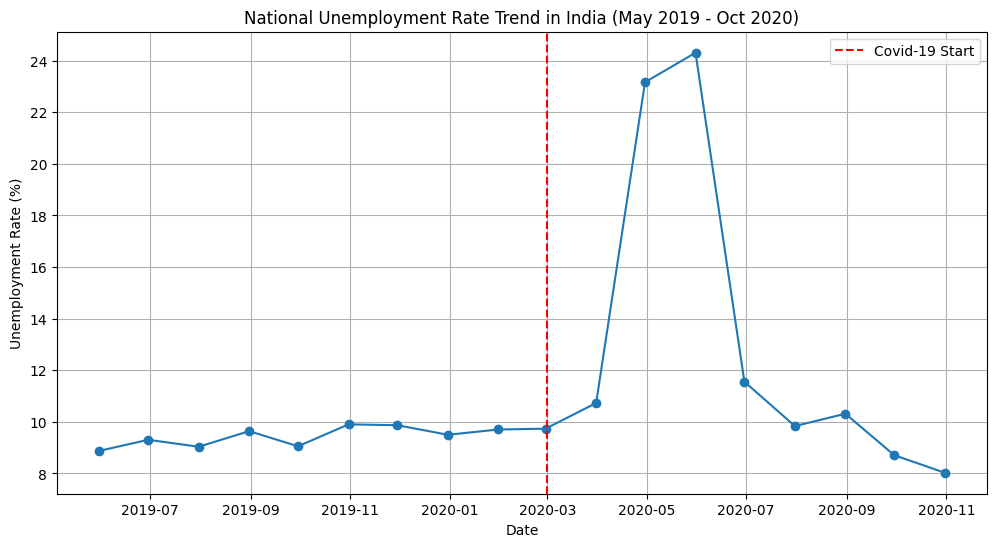

In [ ]:
monthly_avg = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Date'], monthly_avg['Estimated Unemployment Rate (%)'], marker='o')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid-19 Start')
plt.title('National Unemployment Rate Trend in India (May 2019 - Oct 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

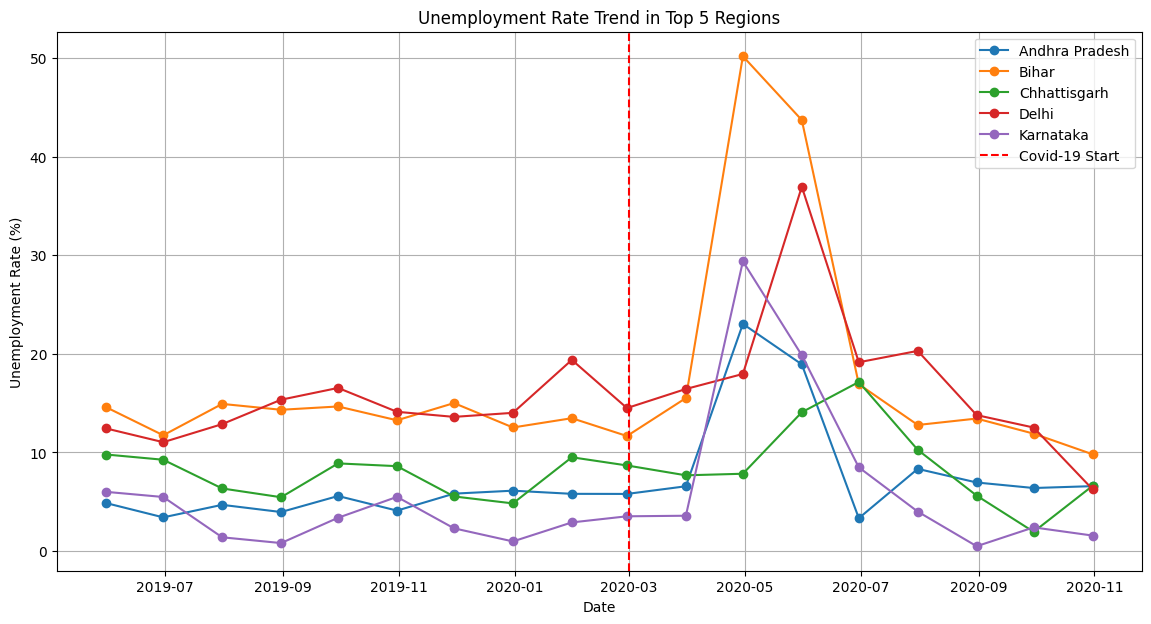

In [ ]:
top_regions = df['Region'].value_counts().index[:5]  # Top 5 states by data points
plt.figure(figsize=(14, 7))
for region in top_regions:
    region_data = df[df['Region'] == region]
    region_monthly = region_data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
    plt.plot(region_monthly.index, region_monthly.values, marker='o', label=region)

plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid-19 Start')
plt.title('Unemployment Rate Trend in Top 5 Regions')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

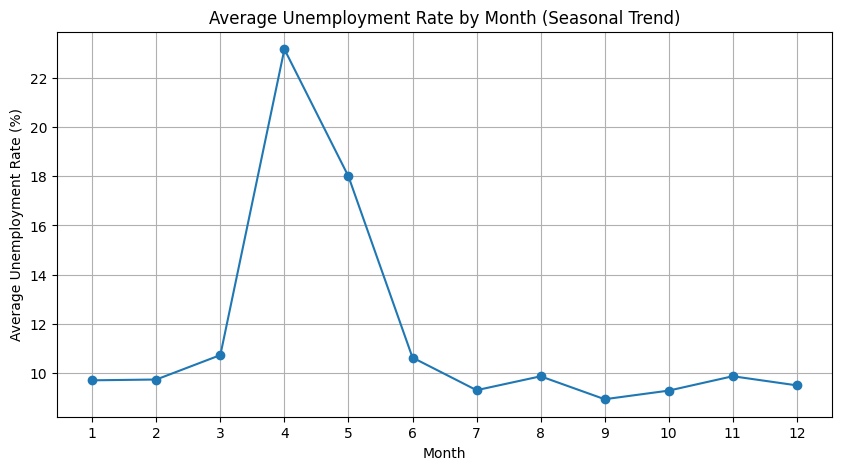

In [ ]:
df['Month'] = df['Date'].dt.month
seasonal_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
plt.plot(seasonal_avg.index, seasonal_avg.values, marker='o')
plt.title('Average Unemployment Rate by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

In [ ]:
print("Insights:")
print("1. The unemployment rate shows a clear spike after March 2020, indicating the impact of Covid-19 lockdowns.")
print("2. Some states experienced sharper rises in unemployment compared to others.")
print("3. Seasonal trends indicate slight variation by month, but Covid impact dominates in 2020.")
print("4. Economic and social policies should focus on employment generation and support especially in hardest-hit regions and during crisis months.")


Insights:
1. The unemployment rate shows a clear spike after March 2020, indicating the impact of Covid-19 lockdowns.
2. Some states experienced sharper rises in unemployment compared to others.
3. Seasonal trends indicate slight variation by month, but Covid impact dominates in 2020.
4. Economic and social policies should focus on employment generation and support especially in hardest-hit regions and during crisis months.
